Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1. Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# wdi contains information for nearly all countries in the world. I want to extract data on internet usage in Vietnam.
# Code for internet use: IT.NET.USER.ZS
# Mobile subscriptions: IT.CEL.SETS
# Vietnam country code: VNM
# Secure Internet Servers: IT.NET.SECR
# GDP Per Capita USD : NY.GDP.PCAP.CD
# India country code: IND

wdi = pd.read_csv("wdi.csv")

In [3]:
vn = wdi[wdi["Country Code"] == "VNM"]
ind = wdi[wdi["Country Code"] == "IND"]


In [5]:
internet = wdi[wdi["Indicator Code"] == "IT.NET.USER.ZS"]
electricity = wdi[wdi["Indicator Code"] == "EG.ELC.ACCS.ZS"]
mobile = wdi[wdi["Indicator Code"] == "IT.CEL.SETS"]
securei = wdi[wdi["Indicator Code"] == "IT.NET.SECR"]
gdp = wdi[wdi["Indicator Code"] == "NY.GDP.PCAP.CD"]

In [6]:
wdi_2 = gdp.append(electricity).append(internet).append(securei).append(mobile)
wdi_2 = pd.DataFrame(wdi_2)

In [26]:
vn_2 = wdi_2[wdi_2["Country Code"] == "VNM"]
ind = wdi_2[wdi_2["Country Code"] == "IND"]
mmr = wdi_2[wdi_2["Country Code"] == "MMR"]
eth = wdi_2[wdi_2["Country Code"] == "ETH"]
syr = wdi_2[wdi_2["Country Code"] == "SYR"]
bgd = wdi_2[wdi_2["Country Code"] == "BGD"]
lka = wdi_2[wdi_2["Country Code"] == "LKA"]

countrylist = [vn_2, ind, mmr, eth, syr, bgd, lka]

for x in countrylist:
    x = x.drop(columns = ['Country Name', 'Country Code', 'Indicator Code'])
    x = x.transpose()
    x = x.dropna()
    x = pd.DataFrame(x)
    x.columns = ["GDP Per Capita","Access to electricity (% of population)","Individuals using the Internet (% of population)","Secure Internet servers","Mobile cellular subscriptions"]
    x = x.drop("Indicator Name")

In [9]:
vn_2 = vn_2.drop(columns = ['Country Name', 'Country Code', 'Indicator Code'])

In [10]:
vn_2 = vn_2.transpose()

In [11]:
vn_2 = vn_2.dropna()

In [12]:
vn_2 = pd.DataFrame(vn_2)

In [13]:
vn_2.columns = ["GDP Per Capita","Access to electricity (% of population)","Individuals using the Internet (% of population)","Secure Internet servers","Mobile cellular subscriptions"]


In [14]:
vn_2 = vn_2.drop("Indicator Name")

In [15]:
vn_2

,GDP Per Capita,Access to electricity (% of population),Individuals using the Internet (% of population),Secure Internet servers,Mobile cellular subscriptions
2010,1310.37,97.5911,30.65,202,1.1157e+08
2011,1515.48,99,35.07,327,1.27318e+08
2012,1722.68,100,36.8,812,1.31674e+08
2013,1871.33,100,38.5,1286,1.23736e+08
2014,2012.05,99.2,41,1864,1.36148e+08
2015,2065.17,100,43.5,3033,1.20324e+08
2016,2170.65,100,46.5,26098,1.206e+08


In [16]:
years = ["2010", "2011", "2012", "2013", "2014", "2015", "2016"]
vn_2 = vn_2.assign(Year = years)


In [17]:
vn_2 = vn_2[['Year','GDP Per Capita',
 'Access to electricity (% of population)',
 'Individuals using the Internet (% of population)',
 'Secure Internet servers',
 'Mobile cellular subscriptions',]]

In [18]:
vn_2 = vn_2.reset_index(drop=True)

In [19]:
vn_2 = vn_2.astype(float)

In [24]:
vn_2

,Year,GDP Per Capita,Access to electricity (% of population),Individuals using the Internet (% of population),Secure Internet servers,Mobile cellular subscriptions
0,2010.0,1310.370273,97.591133,30.65,202.0,111570201.0
1,2011.0,1515.479925,99.000000,35.07,327.0,127318045.0
2,2012.0,1722.683931,100.000000,36.80,812.0,131673724.0
3,2013.0,1871.325491,100.000000,38.50,1286.0,123735557.0
4,2014.0,2012.046290,99.200000,41.00,1864.0,136148124.0
5,2015.0,2065.169099,100.000000,43.50,3033.0,120324052.0
6,2016.0,2170.648054,100.000000,46.50,26098.0,120600235.0


# Choose one variable and plot that variable four different ways.

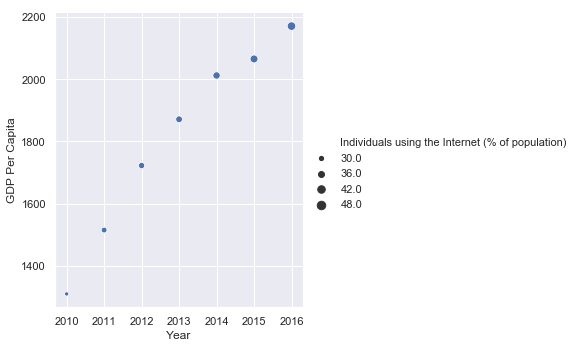

In [20]:
sns.set()
sns.relplot(x="Year", y="GDP Per Capita",
            size="Individuals using the Internet (% of population)",
            data=vn_2);


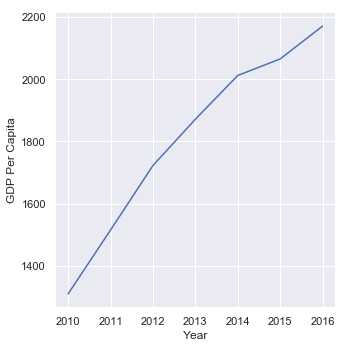

In [21]:
sns.set()
sns.relplot(x="Year", y="GDP Per Capita",
            kind="line",
            data=vn_2);

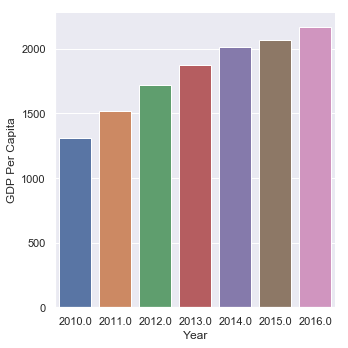

In [22]:
sns.set()
sns.catplot(x="Year", y="GDP Per Capita",
            kind="bar",
            data=vn_2);

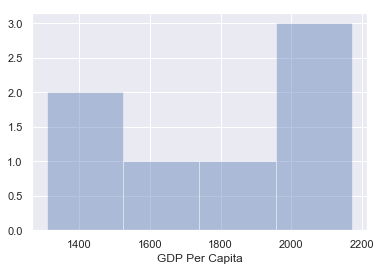

In [23]:
sns.set()
sns.distplot(vn_2["GDP Per Capita"], kde=False, color="b", bins=4)